In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [30]:
gen_event_ = "ttbar-500"
outfile_ = "outfile-" + gen_event_ + ".root"
data_ = uproot.open(outfile_)["ntuples"]["tree"]
data_.keys()

['nevent',
 'nlumi',
 'nrun',
 'trackEta',
 'trackPhi',
 'qoverp',
 'dxy',
 'dsz',
 'trackPt',
 'trackTPIdx',
 'trackEtaError',
 'trackPhiError',
 'qoverpError',
 'dxyError',
 'dszError',
 'trackPtError',
 'trackParameters',
 'covarianceArray',
 'stereoHitX',
 'stereoHitY',
 'stereoHitZ',
 'stereoHitR',
 'stereoHitPhi',
 'stereoHitEta',
 'stereoHitLayer',
 'stereoTPIndex',
 'stereoHitMatch',
 'monoHitX',
 'monoHitY',
 'monoHitZ',
 'monoHitR',
 'monoHitPhi',
 'monoHitEta',
 'monoHitLayer',
 'monoTPIndex',
 'monoHitMatch']

In [31]:
from mpl_toolkits.mplot3d import Axes3D

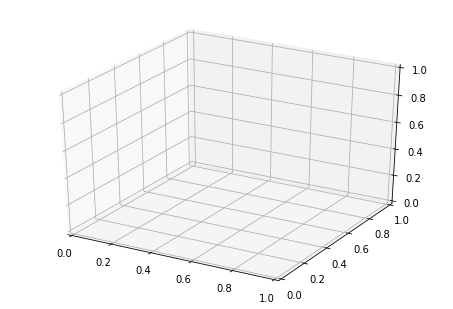

In [32]:
fig_ = plt.figure()
ax_ = Axes3D(fig_)

In [33]:
# Find Number of Events based on any property length
track_eta_ = data_.array("trackEta")
print "Number of Events: ", len(track_eta_)

Number of Events:  500


Iterating over trackEta


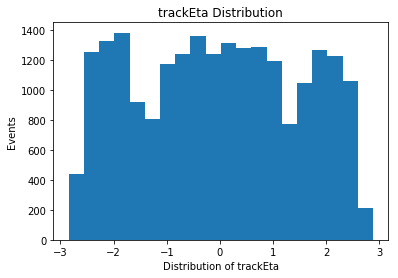

Iterating over trackPhi


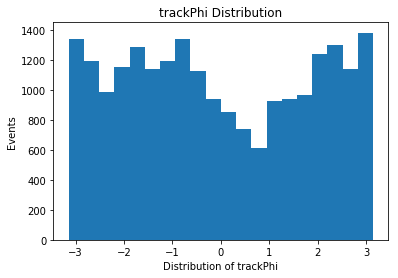

Iterating over qoverp


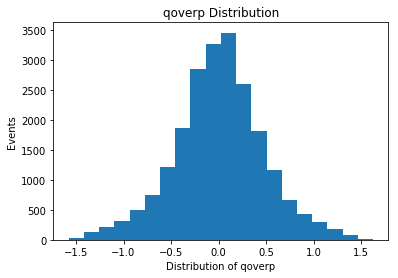

Iterating over dxy


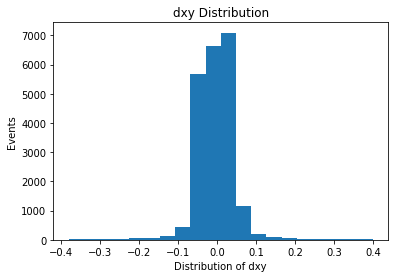

Iterating over dsz


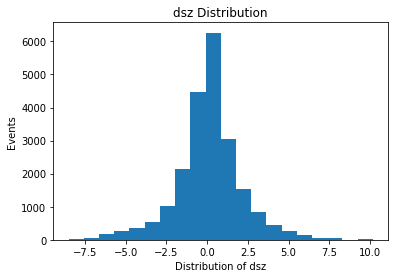

In [34]:
'''
track_properties_ = []
for key in data_.keys():
    if key == 'trackParameters' or key == 'covarianceArray' or 'Hit' in key or 'n' in key or 'Error' in key:
        continue
    else:
        track_properties_.append(key)
'''

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)

    print "Iterating over", key
    concat_track_param_ = []
    for j in range(len(track_param_)):
        concat_track_param_.extend(track_param_[j])
    plt.clf()
    ax_ = plt.subplot()
    ax_.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical')
    plt.ylabel('Events')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

In [35]:
plt.clf()

<Figure size 432x288 with 0 Axes>

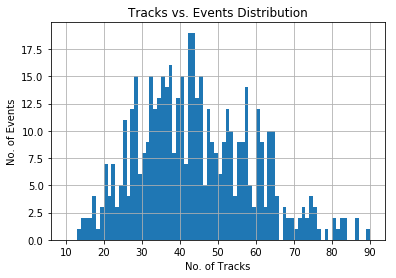

In [36]:
# Plot the distribution of tracks over events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
concat_num_tracks_ = []

for i in range(len(track_Eta_)):
     concat_num_tracks_.append(len(track_Eta_[i]))

ax_ = plt.subplot()
ax_.hist(concat_num_tracks_, histtype='bar', range=(10, 90), bins=80, align='mid', orientation='vertical')

plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Events Distribution')
plt.grid(True)
plt.savefig('plots/' + gen_event_ + '/track/event-track-distribution')
plt.show()

2041151


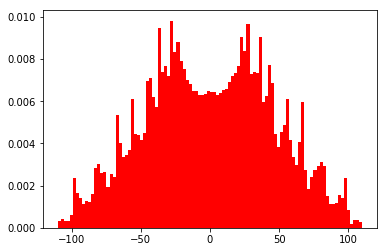

In [37]:
# This plot is just reflecting how root plots the distribution of Rechits along a single axis (X)
mono_x_ = data_.array('monoHitX')
plt.clf()
ax_ = plt.subplot()

mono_rechit_length_ = []

# assumes length of mono_x_ mono_y_ and mono_z_ is the same
for i in range(len(mono_x_)):
        mono_rechit_length_.extend(mono_x_[i])
        
print len(mono_rechit_length_)

ax_.hist(mono_rechit_length_, bins=100, histtype='stepfilled', align='mid', orientation='vertical', color='r', density=True)
plt.show()

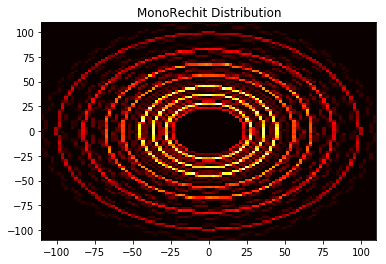

In [38]:
# ToDo: Add lognorm colormap

mono_x_ = data_.array("monoHitX") 
mono_y_ = data_.array("monoHitY")
mono_z_ = data_.array("monoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_mono_x_ = []
    concat_mono_y_ = []

    for i in range(len(mono_x_)):
        concat_mono_x_.extend(mono_x_[i])
        concat_mono_y_.extend(mono_y_[i])

plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('MonoRechit Distribution')
ax_.hist2d(concat_mono_x_, concat_mono_y_, bins=100, normed=True, cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

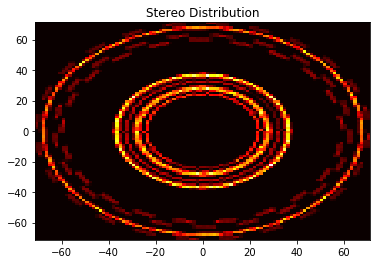

In [39]:
# ToDo: Add lognorm colormap

stereo_x_ = data_.array("stereoHitX") 
stereo_y_ = data_.array("stereoHitY")
stereo_z_ = data_.array("stereoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_stereo_x_ = []
    concat_stereo_y_ = []

    for i in range(len(mono_x_)):
        concat_stereo_x_.extend(stereo_x_[i])
        concat_stereo_y_.extend(stereo_y_[i])

plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('Stereo Distribution')
ax_.hist2d(concat_stereo_x_, concat_stereo_y_, bins=100, normed=True, cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

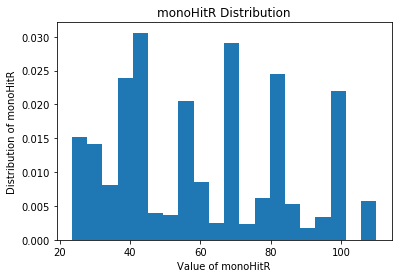

In [ ]:
# Define a loop that plots R, Phi, and Eta for Mono Hits

for param in ["monoHitR", "monoHitPhi", "monoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

In [ ]:
# Define a loop that plots R, Phi, and Eta for Stereo Hits

for param in ["stereoHitR", "stereoHitPhi", "stereoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

In [ ]:
stereo_tp_idx_ = data_.array('stereoTPIndex')
track_tp_idx_ = data_.array('trackTPIdx')

In [ ]:
tmp_ = []
for j in range(len(stereo_tp_idx_)):
    tmp_.append(stereo_tp_idx_[j].tolist().count(-1))

print len(track_tp_idx_) == len(stereo_tp_idx_)

In [ ]:
matched_hits_ = 0
matched_stereo_rechit_ = data_.array('stereoHitMatch')
matched_tracks_ = 0
no_matched_tracks_ = []
# This should not be required with the availability of "matched hit" 
# Iterate over all events and track indices to find a match for rechits
for j in range(len(stereo_tp_idx_)):
    # Print the number of points in each event
    # print len(stereo_tp_idx_[j]), "hits from", len(set(stereo_tp_idx_[j])), "tracking particles"
    unique_tracks_matched_per_event_ = 0
    
    for i in list(set(stereo_tp_idx_[j])):
        if i in track_tp_idx_[j]:
            unique_tracks_matched_per_event_+=1
    
    # Count the entries with hit match value = 1
    # Use this to corroborate that you're counting the right hits
    hit_match_count_ = np.bincount(matched_stereo_rechit_[j])
    
    # The above statement returns an array with count of 0's and 1's
    # we need only the 1's
    if len(hit_match_count_) == 2:
        print hit_match_count_[1], "/",  len(stereo_tp_idx_[j]), "hits matched to",
        print unique_tracks_matched_per_event_,"/", len(track_tp_idx_[j]),"tracks"
        print "No Match for", stereo_tp_idx_[j].tolist().count(-1), "hits and", track_tp_idx_[j].tolist().count(-2), "tracks"
        matched_hits_ += hit_match_count_[1]
    else:
        print "No hits matched for event-----------------------", j
        no_matched_tracks_.append([j, hit_match_count_[0], len(stereo_tp_idx_[j]), unique_tracks_matched_per_event_, len(track_tp_idx_[j])])
    matched_tracks_ += unique_tracks_matched_per_event_
    

total_hits_ = sum([len(hits) for hits in stereo_tp_idx_])
total_tracks_ = sum([len(tracks) for tracks in track_tp_idx_])
# Summary
print "\n", matched_hits_, "/", total_hits_, "hits matched to", matched_tracks_, "/", total_tracks_, "tracks\n"

for unmatched_event_ in no_matched_tracks_:
    print unmatched_event_[1], "hits with zero TP of total",  unmatched_event_[2], "hits and",
    print unmatched_event_[3],"/", unmatched_event_[4],"matched tracks"

unmatched_event_numbers_ = []
for event_data_ in no_matched_tracks_:
    print "\nEvent", event_data_[0]
    unmatched_event_numbers_.append(event_data_[0])
    print "TP = 0:", stereo_tp_idx_[event_data_[0]].tolist().count(0), "hits and", track_tp_idx_[event_data_[0]].tolist().count(0), "tracks"
    print "No Rechit TP Match for", stereo_tp_idx_[event_data_[0]].tolist().count(-1), "/", event_data_[2], "hits"
    print "No Track TP Match:", track_tp_idx_[event_data_[0]].tolist().count(-2), "/", event_data_[4], "tracks"
    #print "Total Particles:", len(stereo_tp_idx_[event_data_[0]])

    for i in track_tp_idx_[event_data_[0]]:
        if i in stereo_tp_idx_[event_data_[0]]:
            print "ERROR: Match found ---------------------------", i

In [ ]:

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)

    print "Iterating over", key
    concat_track_param_ = []
    for j in range(len(track_param_)):
        concat_track_param_.extend(track_param_[j])
    
    print "Number of elements:", len(concat_track_param_)
    ax_ = plt.subplot()
    unmatched_data_ = []
    for event_data_ in no_matched_tracks_:
        # Use the event number from the stored data for the event with no matched tracks
        unmatched_data_.extend(track_param_[j])
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_data_, histtype='bar', bins=20, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label='matched')
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    # plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

In [ ]:
track_eta_ = data_.array('trackEta')

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    print "Iterating over", key

    
    discarded_track_param_ = []
    concat_track_param_ = []
    unmatched_track_param_ = []

    for j in range(len(track_param_)):
        for k in range(len(track_param_[j])):
            
            # Constrain the track eta value
            if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
                if j in unmatched_event_numbers_:
                    unmatched_track_param_.append(track_param_[j][k])
                else:
                    concat_track_param_.append(track_param_[j][k])
            else:
                discarded_track_param_.append(track_param_[j][k])
    
    print "Discarded", len(discarded_track_param_), "and kept", len(concat_track_param_), "/" 
    print len(unmatched_track_param_), "elements"
    ax_ = plt.subplot()
    
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label='matched')
    plt.hist(discarded_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.2, color='green', label='discarded')
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/etabound-' + key)
    plt.show()
    
    

In [ ]:
track_pt_ = data_.array('trackPt').tolist()
track_eta_ = data_.array('trackEta').tolist()
concat_track_pt_ = []
unmatched_track_pt_ = []
discarded_track_pt_= []
for j in range(len(track_pt_)):
    for k in range(len(track_pt_[j])):
       
        # Constrain the track eta value
        if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
            if j in unmatched_event_numbers_:
                unmatched_track_pt_.append(track_pt_[j][k])
            else:
                concat_track_pt_.append(track_pt_[j][k])
        else:
            discarded_track_pt_.append(track_pt_[j][k])


print "Discarded", len(discarded_track_pt_), "and matched", len(concat_track_pt_), "/", len(concat_track_pt_) + len(unmatched_track_pt_), "tracks"
plt.hist(concat_track_pt_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.3, label='matched')
plt.hist(unmatched_track_pt_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.4, label='unmatched')
plt.hist(discarded_track_pt_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.2, label='discarded')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Distribution of pt')
plt.xscale('log')
plt.yscale('log')
plt.title('Track pt Distribution')
plt.savefig('plots/' + gen_event_ + '/track/etabound-trackpt-logscale')
plt.show()

In [ ]:
# Check that the arrays are of equal lengths - i.e. each point has an index and an x, y, z coordinate
for i in range(len(stereo_tp_idx_)):
    #print len(stereo_tp_idx_[i]), len(stereo_x_[i])
    if len(stereo_tp_idx_[i]) != len(stereo_x_[i]) or len(stereo_tp_idx_[i]) != len(stereo_y_[i]) or len(stereo_tp_idx_[i]) != len(stereo_z_[i]):
        print "Length does not match"
        if len(stereo_tp_idx_[i]) > len(stereo_x_[i]):
            print "There are missing x, y, z coordinates"
        else:
            print "There are undefined cluster indices for these points"
            

In [ ]:
total_tracks_ = sum([len(track) for track in track_tp_idx_])
print "Total tracks: ", total_tracks_

In [ ]:
# associate a global track index for each rechit
track_index_ = 0
x_counter_ = 0
rechit_track_map_ = {}

track_event_map_ = {}

for event in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex in range(len(matched_stereo_rechit_[event])):
        
        if matched_stereo_rechit_[event][hitIndex] == 1:
            if stereo_tp_idx_[event][hitIndex] == -1:
                continue
            x_counter_+=1
            # This means that hit has been matched to a track
            # Now associate a unique ID to that track index and
            # add that row into the rechit map
            unique_id_ = (event, stereo_tp_idx_[event][hitIndex])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])

In [ ]:
print track_index_
print (x_counter_)

In [ ]:
#for key in sorted(track_event_map_):
#    print key, track_event_map_[key]    
print len(track_event_map_.keys())

In [ ]:
track_count_ = {}
for track in rechit_track_map_.keys():
    count_ = len(rechit_track_map_[track])
    if count_ in track_count_:
        track_count_[count_] += 1
    else:
        track_count_[count_] = 1

In [ ]:
track_count_

In [ ]:
plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('Hits vs. Tracks')
ax_.hist2d(track_count_.values(), track_count_.keys(), bins=20)
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Hits')
plt.title('Hit Distribution')
plt.savefig('plots/' + gen_event_ + '/track/hitdistribution')
plt.show()

In [ ]:
plt.clf()
ax_ = plt.subplot()
# Plot the ,2D Histogram for Mono Rechits
ax_.set_title('MonoRechit Distribution of ' + param)
ax_.hist(track_count_.keys(), weights=track_count_.values(), bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
plt.xlabel('Value of ' + param)
plt.ylabel('Distribution of ' + param)
plt.title(param + ' Distribution')
plt.savefig('plots/' + gen_event_ + '/mono/' + param)
plt.show()